In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from pandas.plotting import register_matplotlib_converters
from statistics import *
sns.set()
plt.rcParams["figure.figsize"] = [16,9]

In [3]:
df = pd.read_csv(r"C:\Users\Madhukar\Documents\Mechine_learning\Projects\Time_series_Arima\AB_NYC_2019.csv")

#### Q 1: Take any data from the internet and form a supervised machine learning problem around it.

In [4]:
# Below is Airbnb data for NYC,here we are predicting the price using supervised machine learing
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [14]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
# droping the irrelavent data from the dataset
df = df.drop(columns = ["id","host_name","name",'last_review',"latitude",'longitude',"host_id"])

In [32]:
# replacing the null values with zero
df.fillna({'reviews_per_month':0}, inplace=True)

In [33]:
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

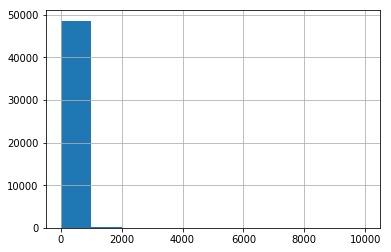

In [34]:
#We see that the average price is 152. Price varies between 0 to 10K
hg=df["price"].hist()

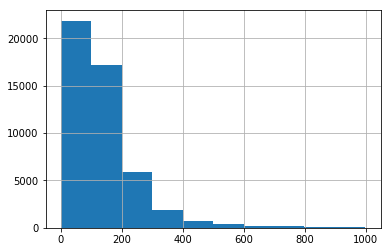

In [35]:
# above plot most of the data in around 1000 range,again further ploting the histogram for checking the distribution of data
hg1=df['price'][df['price']<1000].hist()

In [49]:
#these are lavish room rent price, which has skewed the data treating these as outlayers and excluding the same.
df1= df[df['price']>=1000]
df1.count()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [50]:
# excluding the outlayers
df=df[df['price']<1000]

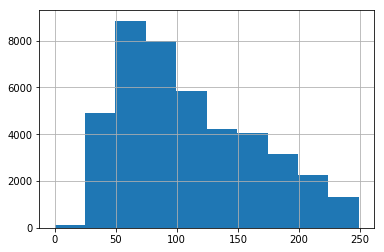

In [51]:
# further for normal distribution, considering 250 as threshold
hg2 = df['price'][df['price']<250].hist()

In [53]:
# We use 250 as threshold price 
df=df[df["price"]<250]

In [54]:
df['price'].describe()

count    42669.000000
mean       107.897748
std         53.803457
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        249.000000
Name: price, dtype: float64

In [56]:
X=df.loc[:,df.columns != 'price']
Y=df['price']

In [59]:
# below we are spliting the data into train and test data, further apply supervised algorithm model we can predict the price.  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

#### Q2: What is the difference between a dataframe and a series? What are the different types of datatypes present in Pandas?

Series can only contain single list with index, whereas dataframe can be made of more than one series or we can say
that a dataframe is a collection of series that can be used to analyse the data.

A Pandas Series is one dimensioned whereas a DataFrame is two dimensioned. 
Therefore, a single column DataFrame can have a name for its single column but a Series cannot have a column name.

#### Datatypes in Pandas:
Integer,Complex Number, Floating point number,Boolean,Object,datetime,Category

#### Q 3: Explain all the metrics which I have written codes about. For example, explain what did you infer from the code df.describe()

df.shape = gives the row and column number details.

df.info() = concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype 
and column dtypes, non-null values and memory usage.

df.describe()= Pandas describe() is used to view some basic statistical details like percentile, mean,std,count,min and max of a data frame or a series of numeric values.

### Q 4: Preprocessing of testdataset

In [174]:
data = pd.read_csv(r"C:\Users\Madhukar\Documents\Mechine_learning\Projects\Time_series_Arima\testset.csv")
data.shape

(100990, 2)

In [175]:
#missing values in temperature
df1=pd.isnull(data['Temperature'])
data[df1].count()

datetime       673
Temperature      0
dtype: int64

In [176]:
#using interpolate method to impute the missing values
data['Temperature'] = data.Temperature.interpolate(method='linear')

In [177]:
df1=pd.isnull(data['Temperature'])
data[df1].count()

datetime       0
Temperature    0
dtype: int64

In [178]:
data['datetime'] = pd.to_datetime(data['datetime'].apply(lambda x: datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))

In [179]:
data = data.set_index('datetime',drop=True)
data.index.name = 'datetime'

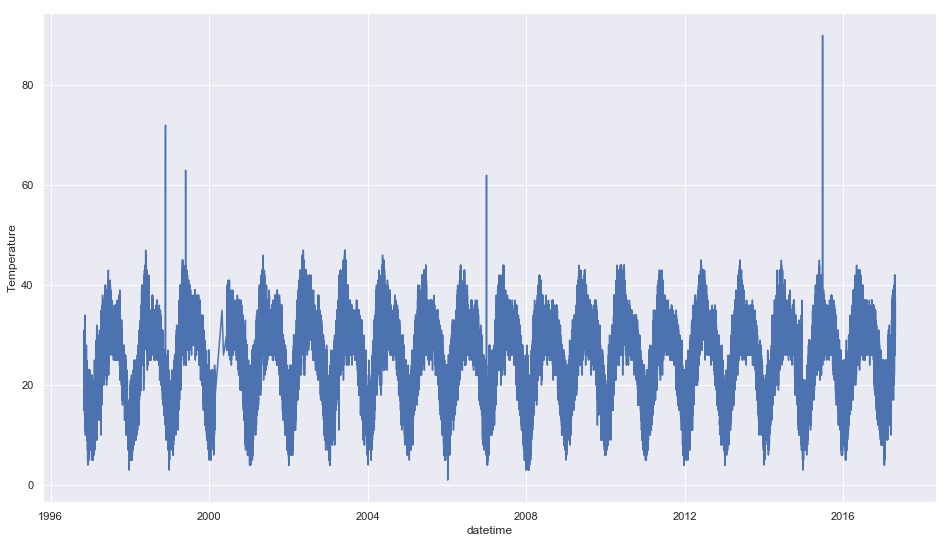

In [186]:
# below graph has seasonality but no trend, having outlayers and missing data at 2001 year
plt.xlabel('datetime')
plt.ylabel('Temperature')
plt.plot(data)

In [185]:
# using IQR method to display outlier data,IQR is the first quartile subtracted from the third quartile
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Temperature    13.0
dtype: float64


In [187]:
# removing the outlayers
data_out= data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(100986, 1)

In [236]:
#excluding the missing and retaining years of 12 months data
data = data_out['2001':'2016']
data.shape

(76507, 1)

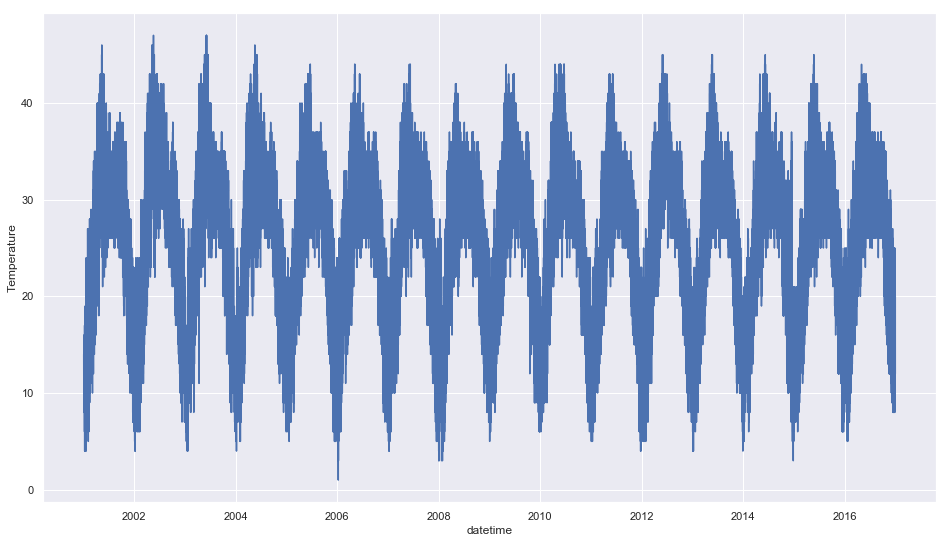

In [237]:
#post excluding the outlayers and missing values.
plt.xlabel('datetime')
plt.ylabel('Temperature')
plt.plot(data)

### Q 5: Read about the functions used in the code and write about it 

Grouper(freq='A') - Specify a resample operation on the column "date" for "Year End date" frequency

groupby - A groupby operation involves some combination of splitting the object, applying a function, and combining the results. 
This can be used to group large amounts of data and compute operations on these groups.

pd.to_datetime(df['Month'], infer_datetime_format=True) -  Convert argument to datetime,if infer_datetime_format is True 
and no format is given, attempt to infer the format of the datetime strings.

df.set_index(['Month']) - setting the month as index for data frame.

shift - function Shift index by desired number of periods with an optional time freq. This function takes a 
scalar parameter called period, which represents the number of shifts to be made over the desired axis.

### Q 6: Analyze the mean temperature data which will be attached with the files on Github

In [238]:
data2 = data.to_period(freq='M')

In [239]:
# yearly mean
data3 = data2.resample("A").agg(['mean'])

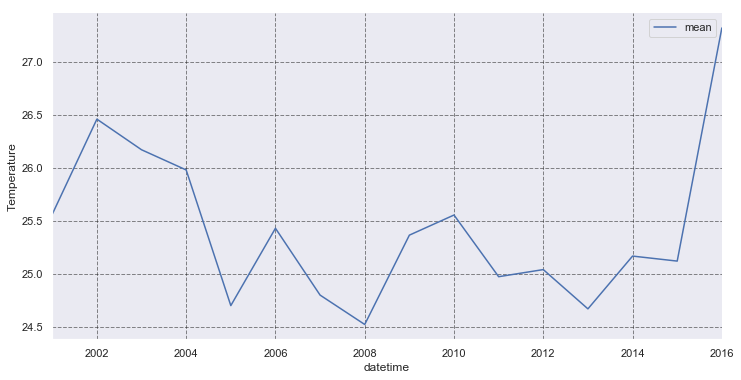

In [240]:
data3.Temperature.plot(figsize=(12, 6))
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature")
sns.despine()

#### From the above chart, year 2016 has an highest average temperature of around 27.3 and 2008 has an average of 24.5 
2002 year onwards, annual temperature had a downward trend till 2008 and sudden spike in 2009 and 2010 followed with
downward trend and huge spike post 2015 onwards.

In [246]:
#monthly mean data
mm = data.groupby([pd.Grouper(freq="M")]).mean()

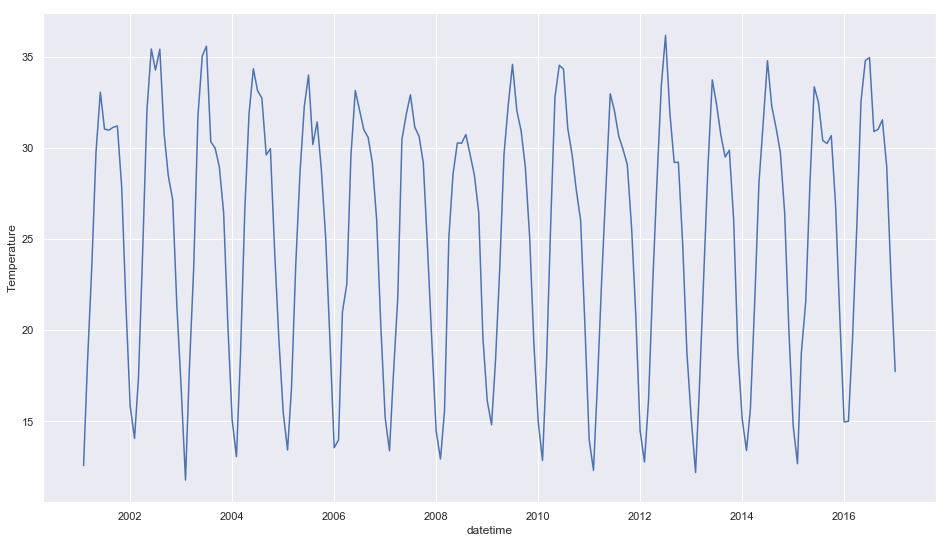

In [242]:
plt.xlabel('datetime')
plt.ylabel('Temperature')
plt.plot(mm)

From the above chart,FW - fall winter (Sep - Feb), SS- summer spring ( Mar - Aug)

FW will have a lower temperature, average of 20 degree celsius, Jan being the least around 13

SS will have a higher temperature, average of 30 degree celsius,June being the peak around 33.5.